In [1]:
# public libraries
import pandas as pd
import numpy as np
import pickle as pkl

## compiling the datasets

In [2]:
# ERGO-II

# mcpas test 
results = pd.DataFrame(pkl.load(open('../external/ERGO-II/Samples/mcpas_test_samples.pickle', 'rb')))
results = results.loc[results['t_cell_type'] == 'CD8']
results = results.loc[results['mhc'].isin(['HLA-A*02:01','HLA-A*02'])]
results = results[['tcrb','peptide','sign']].dropna()
results = results.loc[(results != 'UNK').all(1)].reset_index().iloc[:, 1:]
results.columns = ['CDR3','Epitope','y']
results.to_csv('../outputs/model_comparison/external_hlaa0201.ergoii.mcpas_test.csv')
results = results.loc[results['Epitope'].apply(len) <= 9]
results = results.loc[results['CDR3'].apply(len) <= 30]
results.to_csv('../outputs/model_comparison/external_hlaa0201.ergoii_pep9.mcpas_test.csv')
# vdjdb test (w/o 10x)
results = pd.DataFrame(pkl.load(open('../external/ERGO-II/Samples/vdjdb_no10x_test_samples.pickle', 'rb')))
results = results.loc[results['t_cell_type'] == 'MHCI']
results = results.loc[results['mhc'].isin(['HLA-A*02:01','HLA-A*02'])]
results = results[['tcrb','peptide','sign']].dropna()
results = results.loc[(results != 'UNK').all(1)].reset_index().iloc[:, 1:]
results.columns = ['CDR3','Epitope','y']
results.to_csv('../outputs/model_comparison/external_hlaa0201.ergoii.vdjdb_no10x_test.csv')
results = results.loc[results['Epitope'].apply(len) <= 9]
results = results.loc[results['CDR3'].apply(len) <= 30]
results.to_csv('../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_no10x_test.csv')
# vdjdb test 
results = pd.DataFrame(pkl.load(open('../external/ERGO-II/Samples/vdjdb_test_samples.pickle', 'rb')))
results = results.loc[results['t_cell_type'] == 'MHCI']
results = results.loc[results['mhc'].isin(['HLA-A*02:01','HLA-A*02'])]
results = results[['tcrb','peptide','sign']].dropna()
results = results.loc[(results != 'UNK').all(1)].reset_index().iloc[:, 1:]
results.columns = ['CDR3','Epitope','y']
results.to_csv('../outputs/model_comparison/external_hlaa0201.ergoii.vdjdb_test.csv')
results = results.loc[results['Epitope'].apply(len) <= 9]
results = results.loc[results['CDR3'].apply(len) <= 30]
results.to_csv('../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_test.csv')

## converting them to readable formats by each model

In [3]:
from glob import glob

# we want to test on all on the externals
for fn_org in glob('../outputs/model_comparison/external_hlaa0201.*_test.csv'):
    # read in the external data
    df_ext = pd.read_csv(fn_org, index_col=0).reset_index().iloc[:, 1:]
    X = df_ext[['CDR3','Epitope']]
    y = df_ext['y']
    
    # write for TARPON
    fn = fn_org.replace('.csv','.TARPON.csv')
    X.to_csv(fn)
    
    # write for ATM-TCR
    fn = fn_org.replace('.csv','.ATM-TCR.csv')
    pd.concat([X, y], axis=1).to_csv(fn, header=False, index=False)

    # write for pMTnet
    tmp = X.copy()
    tmp['HLA'] = 'A*02:01'
    tmp.columns = ['CDR3','Antigen','HLA']
    fn = fn_org.replace('.csv','.pMTnet.csv')
    tmp.to_csv(fn, index=False)

#     # ignored because only restricted to three antigens
#     # write for NetTCR2
#     fn = fn_org.replace('.csv','.NetTCR2.csv').replace('external.','external_test.')
#     X['CDR3'].to_csv(fn, header=False, index=False)

    # write for NetTCR2 (CLI version)
    fn = fn_org.replace('.csv','.NetTCR2_CLI.csv')
    tmp = X.copy()
    tmp.columns = ['CDR3b','peptide']
    tmp['CDR3a'] = None
    tmp[['CDR3a','CDR3b','peptide']].to_csv(fn, index=False)

    # write for ImRex
    fn = fn_org.replace('.csv','.ImRex.csv')
    tmp = X.copy()
    tmp.columns = ['cdr3','antigen.epitope']
    tmp.to_csv(fn, index=False, sep=';')

    # write for ERGO-II
    fn = fn_org.replace('.csv','.ERGOII.csv')
    tmp = X.copy()
    X.columns = ['TRB','Peptide']
    X['MHC'] = 'HLA-A*02'
    X['T-Cell-Type'] = 'CD8'
    X = X.T.reindex(['TRA','TRB','TRAV','TRAJ','TRBV','TRBJ','T-Cell-Type','Peptide','MHC']).T
    X.to_csv(fn, index=False)

## testing them on each model

In [4]:
# # NetTCR-2.0

# # on ERGO-II pep9
# python nettcr.py -tr test/sample_train.csv -c b \
# -te ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.mcpas_test.NetTCR2_CLI.csv \
# -o ../../outputs/model_comparison/external_hlaa0201_nettcr2.ergoii_pep9.mcpas_test.csv
# python nettcr.py -tr test/sample_train.csv -c b \
# -te ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_no10x_test.NetTCR2_CLI.csv \
# -o ../../outputs/model_comparison/external_hlaa0201_nettcr2.ergoii_pep9.vdjdb_no10x_test.csv
# python nettcr.py -tr test/sample_train.csv -c b \
# -te ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_test.NetTCR2_CLI.csv \
# -o ../../outputs/model_comparison/external_hlaa0201_nettcr2.ergoii_pep9.vdjdb_test.csv


In [5]:
# # ERGO-II (v2 is simply Predict.py but writing it to sys.argv[3])

# # on ERGO-II pep9
# python Predictv2.py vdjdb ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.mcpas_test.ERGOII.csv \
# ../../outputs/model_comparison/external_hlaa0201_ergoiivdjdb.ergoii_pep9.mcpas_test.csv
# python Predictv2.py vdjdb ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_no10x_test.ERGOII.csv \
# ../../outputs/model_comparison/external_hlaa0201_ergoiivdjdb.ergoii_pep9.vdjdb_no10x_test.csv
# python Predictv2.py vdjdb ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_test.ERGOII.csv \
# ../../outputs/model_comparison/external_hlaa0201_ergoiivdjdb.ergoii_pep9.vdjdb_test.csv
# python Predictv2.py mcpas ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.mcpas_test.ERGOII.csv \
# ../../outputs/model_comparison/external_hlaa0201_ergoiimcpas.ergoii_pep9.mcpas_test.csv
# python Predictv2.py mcpas ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_no10x_test.ERGOII.csv \
# ../../outputs/model_comparison/external_hlaa0201_ergoiimcpas.ergoii_pep9.vdjdb_no10x_test.csv
# python Predictv2.py mcpas ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_test.ERGOII.csv \
# ../../outputs/model_comparison/external_hlaa0201_ergoiimcpas.ergoii_pep9.vdjdb_test.csv


In [6]:
# # ImRex

# # on ERGO-II pep9
# python ./src/scripts/predict/predict.py --model ./models/pretrained/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001.h5 \
# --input ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.mcpas_test.ImRex.csv \
# --output ../../outputs/model_comparison/external_hlaa0201_imrex.ergoii_pep9.mcpas_test.csv
# python ./src/scripts/predict/predict.py --model ./models/pretrained/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001.h5 \
# --input ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_no10x_test.ImRex.csv \
# --output ../../outputs/model_comparison/external_hlaa0201_imrex.ergoii_pep9.vdjdb_no10x_test.csv
# python ./src/scripts/predict/predict.py --model ./models/pretrained/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001.h5 \
# --input ../../outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_test.ImRex.csv \
# --output ../../outputs/model_comparison/external_hlaa0201_imrex.ergoii_pep9.vdjdb_test.csv


In [7]:
# # pMTnet

# # on ERGO-II pep9
# nohup python pMTnet.py \
# -input /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201.ergoii_pep9.mcpas_test.pMTnet.csv \
# -library /ssd1/dchen/GNN_PEPTIDE_TCR/external/pMTnet/library \
# -output /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201_pmtnet.ergoii_pep9.mcpas_test \
# -output_log /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/TMP.log &
# nohup python pMTnet.py \
# -input /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_no10x_test.pMTnet.csv \
# -library /ssd1/dchen/GNN_PEPTIDE_TCR/external/pMTnet/library \
# -output /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201_pmtnet.ergoii_pep9.vdjdb_no10x_test \
# -output_log /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/TMP.log &
# nohup python pMTnet.py \
# -input /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_test.pMTnet.csv \
# -library /ssd1/dchen/GNN_PEPTIDE_TCR/external/pMTnet/library \
# -output /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201_pmtnet.ergoii_pep9.vdjdb_test \
# -output_log /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/TMP.log &


In [8]:
# # ATM-TCR

# # on ERGO-II pep9
# python main.py --infile /ssd1/dchen/GNN_PEPTIDE_TCR/external/ATM-TCR/data/combined_dataset.csv \
# --indepfile /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_no10x_test.ATM-TCR.csv \
# --model_name original.ckpt --mode test --save_model False --cuda False
# python main.py --infile /ssd1/dchen/GNN_PEPTIDE_TCR/external/ATM-TCR/data/combined_dataset.csv \
# --indepfile /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201.ergoii_pep9.mcpas_test.ATM-TCR.csv \
# --model_name original.ckpt --mode test --save_model False --cuda False
# python main.py --infile /ssd1/dchen/GNN_PEPTIDE_TCR/external/ATM-TCR/data/combined_dataset.csv \
# --indepfile /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_test.ATM-TCR.csv \
# --model_name original.ckpt --mode test --save_model False --cuda False


In [9]:
# # TARPON

# # on ERGO-II pep9
# python fishing.py \
# -b /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201.ergoii_pep9.mcpas_test.TARPON.csv \
# -c /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201_tarpon.ergoii_pep9.mcpas_test.csv
# python fishing.py \
# -b /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_test.TARPON.csv \
# -c /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201_tarpon.ergoii_pep9.vdjdb_test.csv
# python fishing.py \
# -b /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201.ergoii_pep9.vdjdb_no10x_test.TARPON.csv \
# -c /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_hlaa0201_tarpon.ergoii_pep9.vdjdb_no10x_test.csv


In [10]:
# these are the same
!cp ../outputs/model_comparison/external_test_avib.ergoii.mcpas_test.csv ../outputs/model_comparison/external_hlaa0201_avib.ergoii.mcpas_test.csv
!cp ../outputs/model_comparison/external_test_avib.ergoii_pep9.mcpas_test.csv ../outputs/model_comparison/external_hlaa0201_avib.ergoii_pep9.mcpas_test.csv

NetTCR-2.0 0.7003514849479356
TARPON 0.7742899396296746
ERGOII-VDJdb 0.7336387301973177
ERGOII-McPAS 0.6684582776224626
ImRex 0.7325764251853653
pMTnet 0.5036364004699971
ATM-TCR 0.4533864612454925
AVIB 0.7735986183704063



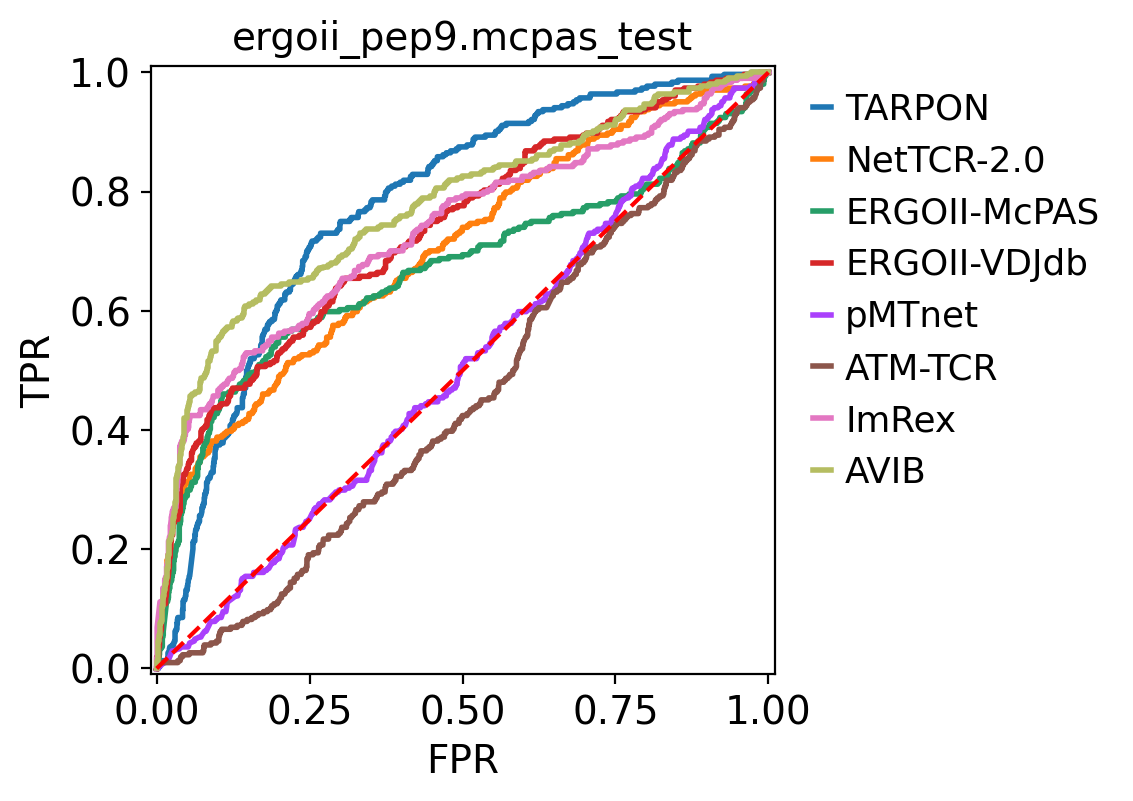

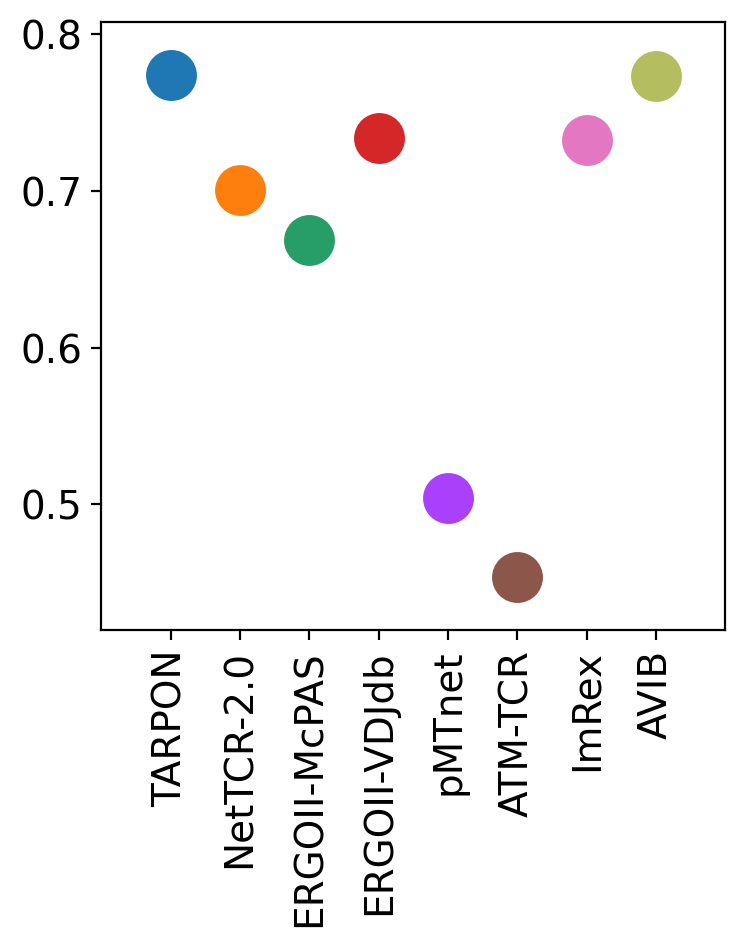

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
sc.settings.set_figure_params(dpi=100)

from glob import glob
from sklearn.metrics import roc_curve, auc, accuracy_score

for pattern in ['*ergoii_pep9.mcpas_test*']:
    # loop through each external dataset
    fns = glob('../outputs/model_comparison/external_hlaa0201_' + pattern)
    name2model = {'nettcr2':'NetTCR-2.0','avib':'AVIB','ergoiivdjdb':'ERGOII-VDJdb',
                  'ergoiimcpas':'ERGOII-McPAS','imrex':'ImRex','pmtnet':'pMTnet',
                  'tarpon':'TARPON','atmtcr':'ATM-TCR'}
    model2auc = {}

    for fn in fns:
        # retrieve model and testing details
        name = fn.split('/')[-1].split('_')[2].split('.')[0]
        model = name2model[name]
        dataset = fn.split(f'_{name}')[-1].replace('csv','')[1:-1]
        fn_org = fn.replace(f'_{name}','') if 'csv' in fn else fn.replace(f'_{name}','') + '.csv'
        # read in the original file
        df_org = pd.read_csv(fn_org, index_col=0)

        print(model, end=' ')
        # read in the prediction file
        if model == 'NetTCR-2.0':
            df_ext = pd.read_csv(fn)
            fpr, tpr, _ = roc_curve(df_org['y'], df_ext['prediction'])
            metric_auc = auc(fpr, tpr)
            print(metric_auc)
        elif model == 'AVIB':
            df_ext = pd.read_csv(fn, index_col=0)
            fpr, tpr, _ = roc_curve(df_org['y'], df_ext['pred'])
            metric_auc = auc(fpr, tpr)
            print(metric_auc)
        elif model.startswith('ERGOII'):
            df_ext = pd.read_csv(fn, index_col=0)
            fpr, tpr, _ = roc_curve(df_org['y'], df_ext['Score'])
            metric_auc = auc(fpr, tpr)
            print(metric_auc)
        elif model == 'ImRex':
            df_ext = pd.read_csv(fn)
            df_ext['tcr_ag'] = df_ext[['cdr3','antigen.epitope']].agg('+'.join, axis=1)
            df_ext = df_ext.groupby('tcr_ag').mean(numeric_only=True)
            tcr_ags = df_org[['CDR3','Epitope']].agg('+'.join, axis=1)
            pred_score = tcr_ags.map(df_ext['prediction_score']).fillna(0)
            fpr, tpr, _ = roc_curve(df_org['y'], pred_score)
            metric_auc = auc(fpr, tpr)
            print(metric_auc)
        elif model == 'pMTnet':
            df_ext = pd.read_csv(f'{fn}/prediction.csv')
            pred_score = 1 - df_ext['Rank'].values
            fpr, tpr, _ = roc_curve(df_org['y'], pred_score)
            metric_auc = auc(fpr, tpr)
            print(metric_auc)
        elif model == 'TARPON':
            pred_score = pd.read_csv(fn, index_col=0)['0']
            fpr, tpr, _ = roc_curve(df_org['y'], pred_score)
            metric_auc = auc(fpr, tpr)
            print(metric_auc)
        elif model == 'ATM-TCR':
            pred_score = pd.Series(pd.read_table(fn, header=None)[4].values)
            fpr, tpr, _ = roc_curve(df_org['y'], pred_score)
            metric_auc = auc(fpr, tpr)
            print(metric_auc)
        else:
            print(fn)

        # store
        model2auc[model] = fpr, tpr

    # make plot
    order = ['TARPON','NetTCR-2.0','ERGOII-McPAS','ERGOII-VDJdb','pMTnet','ATM-TCR','ImRex','AVIB']
    palette = ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2','#b5bd61']

    fig, ax = plt.subplots(figsize=[4, 4])
    for model, color in zip(order, palette):
        if model not in model2auc:
            continue
        ax.plot(*model2auc[model], lw=2, label=model, color=color)
    ax.plot([0, 1], [0, 1], color='r', linestyle='--')
    ax.grid(False)
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.set_title(dataset)
    ax.legend(frameon=False, bbox_to_anchor=(1.01, 1.01),
              loc='upper left', bbox_transform=ax.transAxes)
    ax.set_xlim(-0.01, 1.01)
    ax.set_ylim(-0.01, 1.01)
    print()

    # make AUC bar plot
    fig, ax = plt.subplots(figsize=[len(model2auc) / 2, 4])
    ax.grid(False)
    for model, color in zip(order, palette):
        if model not in model2auc:
            continue
        ax.scatter(model, auc(*model2auc[model]), color=color, s=3e2)
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_xlim(-1, len(model2auc))
    ymin, ymax = ax.get_ylim()
    ystep = ymax - ymin
    ax.set_ylim(ymin-0.05*ystep, ymax+0.05*ystep)

In [12]:
# grab the relevant TCRs
df3 = pd.read_table('/ssd1/dchen/TCR_AG_PAPER/LITERATURE/minervina_pogorelyy_elife_2021/Table_S3.tsv')
df3 = df3.loc[df3['CD'] == 'CD8']
df3 = df3[['CDR3.amino.acid.sequence','YLQ_tetramer_match']].dropna()
df3.columns = ['CDR3','Match']; df3['Epitope'] = 'YLQPRTFLL'

df5 = pd.read_table('/ssd1/dchen/TCR_AG_PAPER/LITERATURE/minervina_pogorelyy_elife_2021/Table_S5.tsv')
df5 = df5.loc[df5['CD'] == 'CD8']
df5 = df5[['CDR3.amino.acid.sequence','YLQ_tetramer_match']].dropna()
df5.columns = ['CDR3','Match']; df5['Epitope'] = 'YLQPRTFLL'

# check the YLQ vs. Non-YLQs
df_ext = pd.concat([df3, df5], axis=0).reset_index().iloc[:, 1:]

# clean the data
def is_present(x): return '_' in x
df_ext = df_ext.loc[~df_ext['CDR3'].apply(is_present)]
def is_present(x): return '#' in x
df_ext = df_ext.loc[~df_ext['CDR3'].apply(is_present)]
def is_present(x): return 'X' in x
df_ext = df_ext.loc[~df_ext['CDR3'].apply(is_present)]

df_ext['y'] = 1 * df_ext['Match']
df_ext = df_ext[['CDR3','Epitope','y']]

In [13]:
# we want to test on all on the externals
fn_org = '../outputs/model_comparison/external_minervina.minervina_test.csv'
df_ext.to_csv(fn_org)

# read in the external data
df_ext = pd.read_csv(fn_org, index_col=0).reset_index().iloc[:, 1:]
X = df_ext[['CDR3','Epitope']]
y = df_ext['y']

# write for TARPON
fn = fn_org.replace('.csv','.TARPON.csv')
X.to_csv(fn)

# write for ATM-TCR
fn = fn_org.replace('.csv','.ATM-TCR.csv')
pd.concat([X, y], axis=1).to_csv(fn, header=False, index=False)

# write for pMTnet
tmp = X.copy()
tmp['HLA'] = 'A*02:01'
tmp.columns = ['CDR3','Antigen','HLA']
fn = fn_org.replace('.csv','.pMTnet.csv')
tmp.to_csv(fn, index=False)

#     # ignored because only restricted to three antigens
#     # write for NetTCR2
#     fn = fn_org.replace('.csv','.NetTCR2.csv').replace('external.','external_test.')
#     X['CDR3'].to_csv(fn, header=False, index=False)

# write for NetTCR2 (CLI version)
fn = fn_org.replace('.csv','.NetTCR2_CLI.csv')
tmp = X.copy()
tmp.columns = ['CDR3b','peptide']
tmp['CDR3a'] = None
tmp[['CDR3a','CDR3b','peptide']].to_csv(fn, index=False)

# write for ImRex
fn = fn_org.replace('.csv','.ImRex.csv')
tmp = X.copy()
tmp.columns = ['cdr3','antigen.epitope']
tmp.to_csv(fn, index=False, sep=';')

# write for ERGO-II
fn = fn_org.replace('.csv','.ERGOII.csv')
tmp = X.copy()
X.columns = ['TRB','Peptide']
X['MHC'] = 'HLA-A*02'
X['T-Cell-Type'] = 'CD8'
X = X.T.reindex(['TRA','TRB','TRAV','TRAJ','TRBV','TRBJ','T-Cell-Type','Peptide','MHC']).T
X.to_csv(fn, index=False)

In [14]:
# python nettcr.py -tr test/sample_train.csv -c b \
# -te ../../outputs/model_comparison/external_minervina.minervina_test.NetTCR2_CLI.csv \
# -o ../../outputs/model_comparison/external_minervina_nettcr2.minervina.csv

# python Predictv2.py vdjdb ../../outputs/model_comparison/external_minervina.minervina_test.ERGOII.csv \
# ../../outputs/model_comparison/external_minervina_ergoiivdjdb.ergoii.vdjdb_test.csv
# python Predictv2.py mcpas ../../outputs/model_comparison/external_minervina.minervina_test.ERGOII.csv \
# ../../outputs/model_comparison/external_minervina_ergoiimcpas.ergoii.vdjdb_test.csv

# python ./src/scripts/predict/predict.py --model ./models/pretrained/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001/2020-07-24_19-18-39_trbmhcidown-shuffle-padded-b32-lre4-reg001.h5 \
# --input ../../outputs/model_comparison/external_minervina.minervina_test.ImRex.csv \
# --output ../../outputs/model_comparison/external_minervina_imrex.minervina.csv

# nohup python pMTnet.py \
# -input /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_minervina.minervina_test.pMTnet.csv \
# -library /ssd1/dchen/GNN_PEPTIDE_TCR/external/pMTnet/library \
# -output /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_minervina_pmtnet.minervina \
# -output_log /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/TMP.log &

# python main.py --infile /ssd1/dchen/GNN_PEPTIDE_TCR/external/ATM-TCR/data/combined_dataset.csv \
# --indepfile /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_minervina.minervina_test.ATM-TCR.csv \
# --model_name original.ckpt --mode test --save_model False --cuda False

# python fishing.py \
# -b /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_minervina.minervina_test.TARPON.csv \
# -c /ssd1/dchen/GNN_PEPTIDE_TCR/outputs/model_comparison/external_minervina_tarpon.minervina.csv


pMTnet 0.4410148674854557
ERGOII-McPAS 0.44343891402714936
ATM-TCR 0.5123626373626373
NetTCR-2.0 0.5294117647058822
ImRex 0.3296703296703297
ERGOII-VDJdb 0.7016806722689075
TARPON 0.8445378151260503
AVIB 0.4573367808661926



(0.275609243697479, 0.898598901098901)

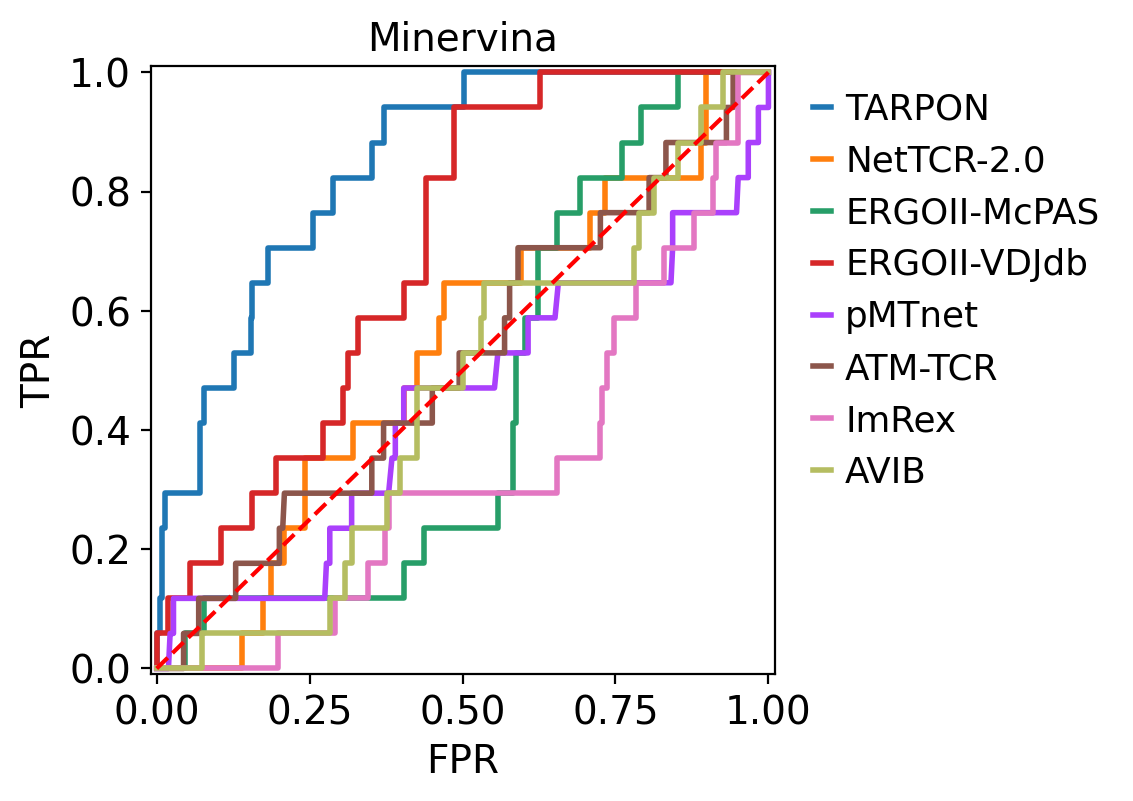

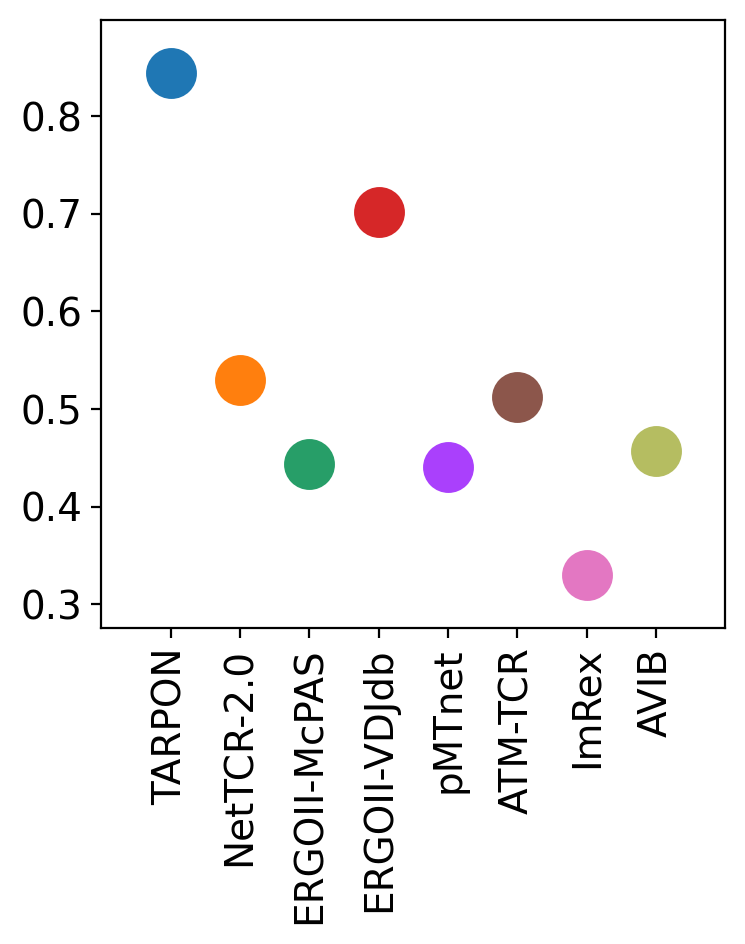

In [15]:
# loop through each external dataset
fn_org = '../outputs/model_comparison/external_minervina.minervina_test.csv'
fns = glob('../outputs/model_comparison/external_minervina_*')
name2model = {'nettcr2':'NetTCR-2.0','avib':'AVIB','ergoiivdjdb':'ERGOII-VDJdb',
              'ergoiimcpas':'ERGOII-McPAS','imrex':'ImRex','pmtnet':'pMTnet',
              'tarpon':'TARPON','atmtcr':'ATM-TCR'}
model2auc = {}

for fn in fns:
    # retrieve model and testing details
    name = fn.split('/')[-1].split('_')[2].split('.')[0]
    model = name2model[name]
    # read in the original file
    df_org = pd.read_csv(fn_org, index_col=0)

    print(model, end=' ')
    # read in the prediction file
    if model == 'NetTCR-2.0':
        df_ext = pd.read_csv(fn)
        fpr, tpr, _ = roc_curve(df_org['y'], df_ext['prediction'])
        metric_auc = auc(fpr, tpr)
        print(metric_auc)
    elif model == 'AVIB':
        df_ext = pd.read_csv(fn, index_col=0)
        fpr, tpr, _ = roc_curve(df_org['y'], df_ext['pred'])
        metric_auc = auc(fpr, tpr)
        print(metric_auc)
    elif model.startswith('ERGOII'):
        df_ext = pd.read_csv(fn, index_col=0)
        fpr, tpr, _ = roc_curve(df_org['y'], df_ext['Score'])
        metric_auc = auc(fpr, tpr)
        print(metric_auc)
    elif model == 'ImRex':
        df_ext = pd.read_csv(fn)
        df_ext['tcr_ag'] = df_ext[['cdr3','antigen.epitope']].agg('+'.join, axis=1)
        df_ext = df_ext.groupby('tcr_ag').mean(numeric_only=True)
        tcr_ags = df_org[['CDR3','Epitope']].agg('+'.join, axis=1)
        pred_score = tcr_ags.map(df_ext['prediction_score']).fillna(0)
        fpr, tpr, _ = roc_curve(df_org['y'], pred_score)
        metric_auc = auc(fpr, tpr)
        print(metric_auc)
    elif model == 'pMTnet':
        df_ext = pd.read_csv(f'{fn}/prediction.csv')
        pred_score = 1 - df_ext['Rank'].values
        fpr, tpr, _ = roc_curve(df_org['y'], pred_score)
        metric_auc = auc(fpr, tpr)
        print(metric_auc)
    elif model == 'TARPON':
        pred_score = pd.read_csv(fn, index_col=0)['0']
        fpr, tpr, _ = roc_curve(df_org['y'], pred_score)
        metric_auc = auc(fpr, tpr)
        print(metric_auc)
    elif model == 'ATM-TCR':
        pred_score = pd.Series(pd.read_table(fn, header=None)[4].values)
        fpr, tpr, _ = roc_curve(df_org['y'], pred_score)
        metric_auc = auc(fpr, tpr)
        print(metric_auc)
    else:
        print(fn)

    # store
    model2auc[model] = fpr, tpr

# make plot
order = ['TARPON','NetTCR-2.0','ERGOII-McPAS','ERGOII-VDJdb','pMTnet','ATM-TCR','ImRex','AVIB']
palette = ['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b', '#e377c2','#b5bd61']

fig, ax = plt.subplots(figsize=[4, 4])
for model, color in zip(order, palette):
    if model not in model2auc:
        continue
    ax.plot(*model2auc[model], lw=2, label=model, color=color)
ax.plot([0, 1], [0, 1], color='r', linestyle='--')
ax.grid(False)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('Minervina')
ax.legend(frameon=False, bbox_to_anchor=(1.01, 1.01),
          loc='upper left', bbox_transform=ax.transAxes)
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(-0.01, 1.01)
print()

# make AUC bar plot
fig, ax = plt.subplots(figsize=[len(model2auc) / 2, 4])
ax.grid(False)
for model, color in zip(order, palette):
    if model not in model2auc:
        continue
    ax.scatter(model, auc(*model2auc[model]), color=color, s=3e2)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlim(-1, len(model2auc))
ymin, ymax = ax.get_ylim()
ystep = ymax - ymin
ax.set_ylim(ymin-0.05*ystep, ymax+0.05*ystep)